In [ ]:
import os
os.getcwd()

'c:\\Users\\athar\\myfiles'

In [4]:
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv('Datasets/eBayClean.csv')

In [7]:
train=data.sample(frac=0.7, random_state=1031)
test=data.drop(labels=train.index)

In [8]:
train.head(5)

,UniqueID,sold,biddable,startprice,condition,cellular,carrier,color,storage,productline,noDescription,charCountDescription,upperCaseDescription,startprice_99end
1107,11108,0,not biddable,196.0,used,Unknown,Unknown,White,Less than 128 GB,iPad 3,contains description,93,4,not a 99 ending
1833,11834,0,not biddable,529.0,new,No cellular,NaN,White,Less than 128 GB,iPad Air 1/2,no description,0,0,not a 99 ending
1351,11352,0,not biddable,425.0,used,Cellular,AT&T,Black,Less than 128 GB,iPad 2,no description,0,0,not a 99 ending
1576,11577,0,not biddable,315.0,used,Unknown,Unknown,Unknown,Less than 128 GB,iPad 4,no description,0,0,not a 99 ending
1170,11171,0,not biddable,275.0,used,No cellular,NaN,Space Gray,Less than 128 GB,iPad mini 2,no description,0,0,not a 99 ending


In [9]:
from statsmodels.formula.api import logit

In [14]:
model=logit('sold ~ startprice',data=train)
log_model=model.fit()

Optimization terminated successfully.
         Current function value: 0.568922
         Iterations 6


In [15]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   sold   No. Observations:                 1303
Model:                          Logit   Df Residuals:                     1301
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:                  0.1770
Time:                        09:45:41   Log-Likelihood:                -741.30
converged:                       True   LL-Null:                       -900.77
Covariance Type:            nonrobust   LLR p-value:                 2.466e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3148      0.109     12.094      0.000       1.102       1.528
startprice    -0.0076      0.001    -14.831      0.000      -0.009      -0.007
==============================================================================
"""

In [17]:
log_model.pvalues

Intercept     1.135439e-33
startprice    9.232289e-50
dtype: float64

In [19]:
log_model.params

Intercept     1.314752
startprice   -0.007560
dtype: float64

In [22]:
print(f"Equation : ln(p/1-p) {log_model.params[0]} + {log_model.params[1]} * startprice3" )

Equation : ln(p/1-p) 1.3147519151309595 + -0.007560240190138989 * startprice3


C:\Users\athar\AppData\Local\Temp\ipykernel_29828\3543959266.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Equation : ln(p/1-p) {log_model.params[0]} + {log_model.params[1]} * startprice3" )


In [25]:
log_model.predict(pd.DataFrame({'startprice':[0,100,200,300,400,10000000000]}))

c:\Users\athar\anaconda4\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


0    0.788307
1    0.636158
2    0.450835
3    0.278218
4    0.153249
5    0.000000
dtype: float64

In [27]:
(
    train.loc[:,['startprice','sold']]
    .assign(pred=log_model.predict())
    .assign(pred_binary=(log_model.predict()>0.4).astype('int'))
)

,startprice,sold,pred,pred_binary
1107,196.0,0,0.458333,1
1833,529.0,0,0.063887,0
1351,425.0,0,0.130295,0
1576,315.0,0,0.256027,0
1170,275.0,0,0.317710,0
...,...,...,...,...
1509,235.0,0,0.386534,0
1020,500.0,0,0.078322,0
807,65.0,1,0.694944,1
1045,92.0,0,0.650039,1


In [29]:
train.columns

Index(['UniqueID', 'sold', 'biddable', 'startprice', 'condition', 'cellular',
       'carrier', 'color', 'storage', 'productline', 'noDescription',
       'charCountDescription', 'upperCaseDescription', 'startprice_99end'],
      dtype='object')

In [30]:
model2=logit('sold ~  color',data=train)
log_model2=model2.fit()
log_model2.summary()

Optimization terminated successfully.
         Current function value: 0.686962
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   sold   No. Observations:                 1303
Model:                          Logit   Df Residuals:                     1298
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:                0.006286
Time:                        10:21:00   Log-Likelihood:                -895.11
converged:                       True   LL-Null:                       -900.77
Covariance Type:            nonrobust   LLR p-value:                   0.02314
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0984      0.115      0.859      0.391      -0.126       0.323
color[T.Gold]          -0.9634      0.319     -3.017      0.003      -1.589      -0.338
color[T.Space Gray]    -0.3373      0.204     -1.656      0.098      -0.737       0.062
color[T.Unknown]       -0.2034      0.146     -1.396      0.163      -0.489       0.082
color[T.White]         -0.2892      0.162     -1.780      0.075      -0.608       0.029
=======================================================================================
"""

In [31]:
(np.exp(log_model2.params.iloc[1])-1)*100

-61.8421052631579

In [32]:
logreg = logit(formula='sold ~ biddable + startprice + condition + cellular + \
color + storage + productline + noDescription + upperCaseDescription + startprice_99end', data = train,)
model3 = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.454808
         Iterations 7


In [33]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   sold   No. Observations:                 1303
Model:                          Logit   Df Residuals:                     1277
Method:                           MLE   Df Model:                           25
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:                  0.3421
Time:                        10:32:20   Log-Likelihood:                -592.61
converged:                       True   LL-Null:                       -900.77
Covariance Type:            nonrobust   LLR p-value:                4.666e-114
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.2508      0.672      3.349      0.001       0.934       3.568
biddable[T.not biddable]               -1.7329      0.159    -10.875      0.000      -2.045      -1.421
condition[T.new]                        1.3171      0.340      3.877      0.000       0.651       1.983
condition[T.refurbished]                0.7866      0.352      2.234      0.026       0.096       1.477
condition[T.used]                       0.8028      0.248      3.232      0.001       0.316       1.290
cellular[T.No cellular]                -0.2101      0.177     -1.188      0.235      -0.557       0.137
cellular[T.Unknown]                    -1.1743      0.400     -2.936      0.003      -1.958      -0.390
color[T.Gold]                           0.1844      0.512      0.360      0.719      -0.819       1.188
color[T.Space Gray]                     0.0740      0.298      0.248      0.804      -0.510       0.658
color[T.Unknown]                        0.0100      0.202      0.049      0.961      -0.386       0.406
color[T.White]                          0.0698      0.223      0.313      0.754      -0.367       0.506
storage[T.Less than 128 GB]            -0.8148      0.497     -1.638      0.101      -1.790       0.160
storage[T.Unknown]                     -0.0401      0.625     -0.064      0.949      -1.265       1.185
productline[T.iPad 1]                   0.1763      0.369      0.478      0.633      -0.547       0.899
productline[T.iPad 2]                   0.2199      0.359      0.612      0.541      -0.485       0.924
productline[T.iPad 3]                   0.7900      0.408      1.936      0.053      -0.010       1.590
productline[T.iPad 4]                   0.7948      0.410      1.938      0.053      -0.009       1.599
productline[T.iPad Air 1/2]             2.0521      0.421      4.880      0.000       1.228       2.876
productline[T.iPad mini]                0.4991      0.359      1.388      0.165      -0.205       1.204
productline[T.iPad mini 2]              1.5234      0.466      3.268      0.001       0.610       2.437
productline[T.iPad mini Retina]         2.4407      0.860      2.838      0.005       0.755       4.126
productline[T.iPad mini3]               1.1562      0.531      2.179      0.029       0.116       2.196
noDescription[T.no description]         0.0784      0.168      0.467      0.640      -0.250       0.407
startprice_99end[T.not a 99 ending]    -0.1012      0.161     -0.629      0.529      -0.416       0.214
startprice                             -0.0101      0.001    -10.276      0.000      -0.012      -0.008
upperCaseDescription                   -0.0128      0.009     -1.386      0.166      -0.031       0.005
=======================================================================================================
"""

In [34]:
model3.aic

1237.228656774646

In [35]:
y = data.sold
X = data.drop(['UniqueID','sold'], axis = 1)
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, 
                                                            random_state=1031, 
                                                            train_size=0.7, 
                                                            stratify=y)

In [37]:
#categorical_features = ['biddable','condition','cellular', 'carrier', 'color','storage','productline','noDescription','startprice_99end']
categorical_features = X_train_raw.select_dtypes('object').columns

X_train = pd.get_dummies(X_train_raw, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test = pd.get_dummies(X_test_raw, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train.head()

,startprice,charCountDescription,upperCaseDescription,biddable_not biddable,condition_new,condition_refurbished,condition_used,cellular_No cellular,cellular_Unknown,carrier_Sprint/T-Mobile,...,productline_iPad 2,productline_iPad 3,productline_iPad 4,productline_iPad Air 1/2,productline_iPad mini,productline_iPad mini 2,productline_iPad mini Retina,productline_iPad mini3,noDescription_no description,startprice_99end_not a 99 ending
1510,160.00,0,0,True,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,True,True
576,279.00,99,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1468,100.00,99,58,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
950,829.99,0,0,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
435,500.00,95,5,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 1510 to 1075
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   startprice                        1302 non-null   float64
 1   charCountDescription              1302 non-null   int64  
 2   upperCaseDescription              1302 non-null   int64  
 3   biddable_not biddable             1302 non-null   bool   
 4   condition_new                     1302 non-null   bool   
 5   condition_refurbished             1302 non-null   bool   
 6   condition_used                    1302 non-null   bool   
 7   cellular_No cellular              1302 non-null   bool   
 8   cellular_Unknown                  1302 non-null   bool   
 9   carrier_Sprint/T-Mobile           1302 non-null   bool   
 10  carrier_Unknown                   1302 non-null   bool   
 11  carrier_Verizon                   1302 non-null   bool   
 12  color_Go

In [39]:
X_train.head()


,startprice,charCountDescription,upperCaseDescription,biddable_not biddable,condition_new,condition_refurbished,condition_used,cellular_No cellular,cellular_Unknown,carrier_Sprint/T-Mobile,...,productline_iPad 2,productline_iPad 3,productline_iPad 4,productline_iPad Air 1/2,productline_iPad mini,productline_iPad mini 2,productline_iPad mini Retina,productline_iPad mini3,noDescription_no description,startprice_99end_not a 99 ending
1510,160.00,0,0,True,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,True,True
576,279.00,99,1,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1468,100.00,99,58,False,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
950,829.99,0,0,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
435,500.00,95,5,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [40]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=10000, random_state=1031)
logit.fit(X_train.loc[:,['startprice']], y_train)

LogisticRegression(max_iter=10000, random_state=1031)

In [41]:
y_pred_proba = logit.predict_proba(X_train.loc[:,['startprice']])
y_pred_proba[:10]

array([[0.46991303, 0.53008697],
       [0.67757012, 0.32242988],
       [0.36454752, 0.63545248],
       [0.99132865, 0.00867135],
       [0.91258114, 0.08741886],
       [0.62999945, 0.37000055],
       [0.69473264, 0.30526736],
       [0.96873406, 0.03126594],
       [0.5422884 , 0.4577116 ],
       [0.2186055 , 0.7813945 ]])

In [42]:
(y_pred_proba[:,1]>0.5).astype('int')

array([1, 0, 1, ..., 1, 1, 1])

In [43]:
y_pred = logit.predict(X_train.loc[:,['startprice']])
y_pred[:10]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [44]:
startprice_200 = pd.DataFrame({'startprice':[200]}) # ipad with a startprice of $200
ipad_200_proba = logit.predict_proba(startprice_200)[:,1]
ipad_200_pred = logit.predict(startprice_200)
print('Predicted probability of selling a $200 iPad: ', ipad_200_proba)
print('Prediction of whether a $200 iPad will sell: ', ipad_200_pred)

Predicted probability of selling a $200 iPad:  [0.4576936]
Prediction of whether a $200 iPad will sell:  [0]


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[498, 202],
       [172, 430]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
sensitivity_or_recall = recall_score(y_train, y_pred)
auc = roc_auc_score(y_train, y_pred_proba[:,1])

pd.Series(data = [accuracy, precision, sensitivity_or_recall, auc],
          index=['Accuracy','Precision', 'Sensitivity or Recall', 'Area Under the Curve'])

Accuracy                 0.712750
Precision                0.680380
Sensitivity or Recall    0.714286
Area Under the Curve     0.787730
dtype: float64

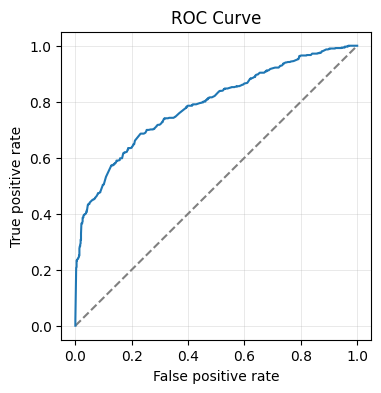

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.figure(figsize=(4, 4))
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:,1])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC Curve')
plt.grid(True, linewidth = 0.5, alpha = 0.4)
plt.show()

In [48]:
logit = LogisticRegression(max_iter=10000, random_state=1031)
logit.fit(X_train.loc[:,['condition_new', 'condition_refurbished','condition_used']], y_train)

LogisticRegression(max_iter=10000, random_state=1031)

In [49]:
y_pred_proba = logit.predict_proba(X_train.loc[:,['condition_new', 'condition_refurbished','condition_used']])
y_pred = logit.predict(X_train.loc[:,['condition_new', 'condition_refurbished','condition_used']])

pd.DataFrame({'predicted_probability':y_pred_proba[:,1],
              'predicted class': y_pred}).head(10)

,predicted_probability,predicted class
0,0.506398,1
1,0.506398,1
2,0.506398,1
3,0.320969,0
4,0.506398,1
5,0.506398,1
6,0.320969,0
7,0.320969,0
8,0.506398,1
9,0.325136,0


In [50]:
condition_new = pd.DataFrame({'condition_new':[True],
                              'condition_refurbished': [False],
                               'condition_used':[False]})
logit.predict_proba(condition_new)

array([[0.67903112, 0.32096888]])

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[242, 458],
       [112, 490]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
sensitivity_or_recall = recall_score(y_train, y_pred)
auc = roc_auc_score(y_train, y_pred_proba[:,1])

pd.Series(data = [accuracy, precision, sensitivity_or_recall, auc],
          index=['Accuracy','Precision', 'Sensitivity or Recall', 'Area Under the Curve'])

Accuracy                 0.562212
Precision                0.516878
Sensitivity or Recall    0.813953
Area Under the Curve     0.589786
dtype: float64

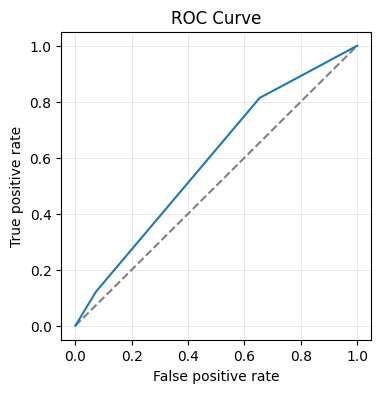

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.figure(figsize=(4, 4))
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:,1])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC Curve')
plt.grid(True, linewidth = 0.5, alpha = 0.4)
plt.show()

In [54]:
logit = LogisticRegression(max_iter=10000,random_state=1031)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=1031)

In [55]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
y_pred_test = logit.predict(X_test)
y_pred_proba_test = logit.predict_proba(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[589, 111],
       [168, 434]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
sensitivity_or_recall = recall_score(y_train, y_pred)
auc = roc_auc_score(y_train, y_pred_proba[:,1])

pd.Series(data = [accuracy, precision, sensitivity_or_recall, auc],
          index=['Accuracy','Precision', 'Sensitivity or Recall', 'Area Under the Curve'])

Accuracy                 0.785714
Precision                0.796330
Sensitivity or Recall    0.720930
Area Under the Curve     0.857502
dtype: float64

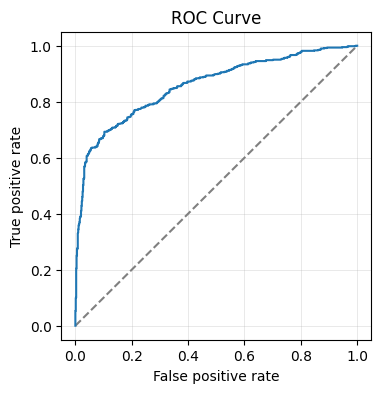

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.figure(figsize=(4, 4))
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:,1])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC Curve')
plt.grid(True, linewidth = 0.5, alpha = 0.4)
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[254,  47],
       [ 62, 196]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
sensitivity_or_recall = recall_score(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_proba_test[:,1])

pd.Series(data = [accuracy, precision, sensitivity_or_recall, auc],
          index=['Accuracy','Precision', 'Sensitivity or Recall', 'Area Under the Curve'])

Accuracy                 0.805009
Precision                0.806584
Sensitivity or Recall    0.759690
Area Under the Curve     0.858508
dtype: float64

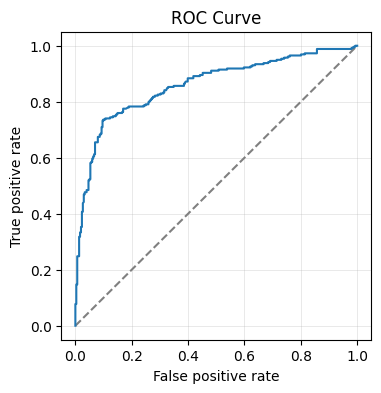

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
plt.figure(figsize=(4, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test[:,1])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC Curve')
plt.grid(True, linewidth = 0.5, alpha = 0.4)
plt.show()